# Полносвязные нейронные сети (FCNN)

## Загрузка данных

Классификация

In [1]:
import pandas as pd

cdata = pd.read_csv('D:/PythonWork/Machine learning and big data/data/balanced_diabetes_data.csv', encoding='utf-8', delimiter=',')

X = cdata.drop(columns=['Diabetes_012', 'Unnamed: 0'])
y = cdata['Diabetes_012']

In [2]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,True,True,True,40,True,False,False,False,False,True,...,True,False,5,18,15,True,False,9,4,3
1,False,False,False,25,True,False,False,True,False,False,...,False,True,3,0,0,False,False,7,6,1
2,True,True,True,28,False,False,False,False,True,False,...,True,True,5,30,30,True,False,9,4,8
3,True,False,True,27,False,False,False,True,True,True,...,True,False,2,0,0,False,False,11,3,6
4,True,True,True,24,False,False,False,True,True,True,...,True,False,2,3,0,False,False,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622537,True,True,True,33,False,False,False,True,True,True,...,True,False,3,0,9,False,False,7,6,8
622538,True,False,True,30,False,False,False,True,True,True,...,True,False,3,0,0,False,False,10,4,6
622539,True,True,True,21,False,False,False,True,False,False,...,True,False,2,0,0,False,False,12,6,4
622540,True,True,True,37,False,False,False,True,True,True,...,True,False,3,0,2,False,False,10,6,8


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled, y)
X_pca.shape

(622542, 10)

Регрессия

In [4]:
import pandas as pd

rdata = pd.read_csv('D:/PythonWork/Machine learning and big data/data/taxi_duration_processed.csv', encoding='utf-8', delimiter=',')
ry = rdata['trip_duration']
rdata.drop(['Unnamed: 0', 'id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration'], axis=1, inplace=True)
rdata

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,route_len,month,hour,week_day
0,2,1,-73.953918,40.778873,-73.963875,40.771164,1.397743,2,16,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,4.148155,3,23,4
2,2,2,-73.997314,40.721458,-73.948029,40.774918,8.070991,2,17,6
3,1,1,-74.017120,40.708469,-73.988182,40.740631,4.802338,2,6,2
4,2,2,-73.993614,40.751884,-73.995422,40.723862,3.116996,2,18,6
...,...,...,...,...,...,...,...,...,...,...
572663,2,1,-73.974487,40.783138,-73.952629,40.772270,2.709620,1,22,0
572664,2,2,-73.965919,40.789780,-73.952637,40.789181,1.475886,5,13,5
572665,1,1,-73.996666,40.737434,-74.001320,40.731911,0.801741,2,0,0
572666,1,1,-73.997849,40.761696,-74.001488,40.741207,2.309847,4,18,4


In [5]:
scaler = StandardScaler()
rX_scaled = scaler.fit_transform(rdata)
rX_scaled = pd.DataFrame(rX_scaled, columns=rdata.columns)

In [6]:
from sklearn.feature_selection import VarianceThreshold

scaler = StandardScaler()
rX_scaled = scaler.fit_transform(rdata)
rX_scaled = pd.DataFrame(rX_scaled, columns=rdata.columns)

vt = VarianceThreshold(1)
rX_vt = vt.fit_transform(rX_scaled)
rX_vt.shape

(572668, 6)

In [7]:
from sklearn.model_selection import train_test_split

X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(rX_vt,
                                                                                                ry,
                                                                                                test_size=0.2)
X_classification_train, X_classification_test, y_classification_train, y_classification_test = train_test_split(X_pca,
                                                                                                                y,
                                                                                                                stratify=y,
                                                                                                                test_size=0.2)

## Модель для регрессии

In [8]:
import tensorflow as tf
import numpy as np

model_regression = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(X_regression_train.shape[1],)),
        tf.keras.layers.Dense(32, activation="linear"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)

In [9]:
model_regression.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainabl

Adam

In [11]:
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="mse", metrics=['mse'])

In [12]:
history = model_regression.fit(
    X_regression_train, y_regression_train,
    epochs=10,
    validation_data=(X_regression_test, y_regression_test)
)

Epoch 1/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 99199.9219 - mse: 99199.9219 - val_loss: 67348.3906 - val_mse: 67348.3906
Epoch 2/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 73670.4844 - mse: 73670.4844 - val_loss: 65379.0977 - val_mse: 65379.0977
Epoch 3/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 71086.5156 - mse: 71086.5156 - val_loss: 63491.5312 - val_mse: 63491.5312
Epoch 4/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 69511.0859 - mse: 69511.0859 - val_loss: 63558.9375 - val_mse: 63558.9375
Epoch 5/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 68754.2656 - mse: 68754.2656 - val_loss: 66673.6562 - val_mse: 66673.6562
Epoch 6/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 68659.4922 - mse: 68659.4922 - val_loss: 63242.8867 - val_mse: 63242.8867
Epoch 7/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 68079.0312 - mse: 68079.0312 - val_loss: 63607.0586 - val_mse: 63607.0586
Epoch 8/10
14317/14317 ━━━━

In [26]:
from matplotlib import pyplot as plt

def visualize(h):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(h.history['loss'], label='Train Loss')
    # plt.plot(h.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    if 'accuracy' in h.history.keys():
        plt.subplot(1, 2, 2)
        plt.plot(h.history['accuracy'], label='Train Accuracy')
        plt.plot(h.history['val_accuracy'], label='Val Accuracy')
        plt.title('Accuracy over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        
    print(h.history.keys())
    if 'mse' in h.history.keys():
        plt.subplot(1, 2, 2)
        plt.plot(h.history['mse'], label='Train MSE')  
        plt.plot(h.history['val_mse'], label='Val MSE') 
        plt.title('MSE over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()

    plt.show()


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


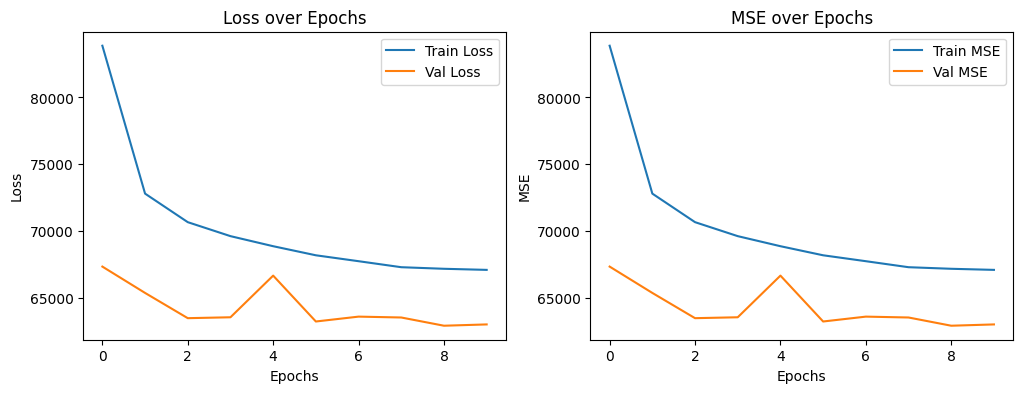

In [14]:
visualize(history)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_regression_test, model_regression.predict(X_regression_test)))
print(mean_squared_error(y_regression_test, model_regression.predict(X_regression_test)))

3580/3580 ━━━━━━━━━━━━━━━━━━━━ 4s 990us/step
184.7981719970703
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 3s 950us/step
63023.85546875


SGD

In [33]:
initializer = tf.keras.initializers.GlorotNormal()

model_regression = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, kernel_initializer=initializer),
    tf.keras.layers.Activation('sigmoid'),
    tf.keras.layers.Dense(units=1)
])

model_regression.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss="mse")

history = model_regression.fit(
    X_regression_train, y_regression_train,
    epochs=5,
    validation_data=(X_regression_test, y_regression_test)
)

Epoch 1/5
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 73245.6719 - val_loss: 66666.7266
Epoch 2/5
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 66272.9922 - val_loss: 65925.8203
Epoch 3/5
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 65734.4375 - val_loss: 65462.7461
Epoch 4/5
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 65721.2891 - val_loss: 65113.0625
Epoch 5/5
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 64886.1875 - val_loss: 65383.3008


dict_keys(['loss', 'val_loss'])


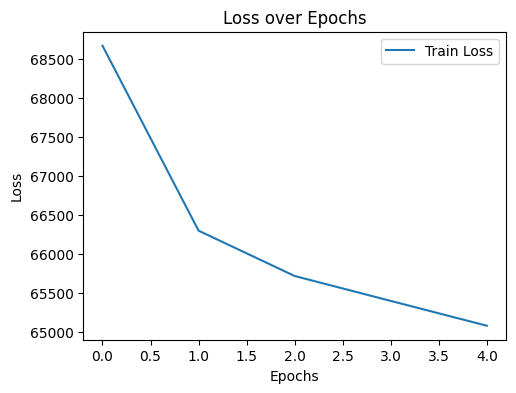

In [34]:
visualize(history)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_regression_test, model_regression.predict(X_regression_test)))
print(mean_squared_error(y_regression_test, model_regression.predict(X_regression_test)))

3580/3580 ━━━━━━━━━━━━━━━━━━━━ 3s 713us/step
186.45848083496094
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 3s 731us/step
65383.30859375


RMSprop 

In [ ]:
# предотвращение проблемы взрывного градиента
initializer = tf.keras.initializers.GlorotNormal()

model_regression = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, kernel_initializer=initializer),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(units=1)
])

rms_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)

# Компиляция модели
model_regression.compile(optimizer=rms_optimizer, loss='mean_squared_error')

# Тренировка модели
history = model_regression.fit(X_regression_train, y_regression_train, epochs=5, verbose=0)

# Оценка результата
test_mse = model_regression.evaluate(X_regression_test, y_regression_test)
print("Test MSE:", test_mse)

3580/3580 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 65911.3594
Test MSE: 65553.546875


dict_keys(['loss'])


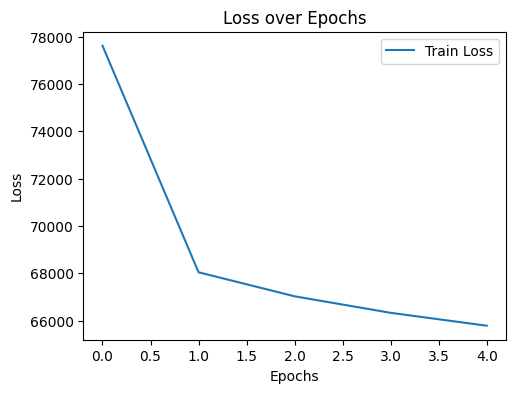

In [27]:
visualize(history)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_regression_test, model_regression.predict(X_regression_test)))
print(mean_squared_error(y_regression_test, model_regression.predict(X_regression_test)))

Подбор гиперпараметров

Optuna

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


def objective(trial):
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.0, 0.5)
    dense_1_units = trial.suggest_int("dense_1_units", 16, 128)
    dense_2_units = trial.suggest_int("dense_2_units", 8, 64)
    dense_3_units = trial.suggest_int("dense_3_units", 4, 32)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(dense_1_units, activation="relu", input_shape=(X_regression_train.shape[1],)),
        tf.keras.layers.Dense(dense_2_units, activation="linear"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(dense_3_units, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation="linear"),
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="mse")

    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    history = model.fit(
        X_regression_train, y_regression_train,
        validation_data=(X_regression_test, y_regression_test),
        epochs=3,
        batch_size=batch_size,
        verbose=0,
        callbacks=[early_stopping],
    )

    val_mse = history.history["val_loss"][-1]
    return val_mse

In [ ]:
study = optuna.create_study(direction="minimize")

study.optimize(objective, n_trials=10)

best_params = study.best_params
best_score = study.best_value

print("Лучшие гиперпараметры:", best_params)
print("Лучшая средняя квадратичная ошибка (MSE):", best_score)

[I 2025-05-27 23:46:45,577] A new study created in memory with name: no-name-b6372bf2-1634-47e3-b8c1-374afe573dc3


C:\Users\sheld\AppData\Local\Temp\ipykernel_25696\1462322525.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
C:\Users\sheld\AppData\Local\Temp\ipykernel_25696\1462322525.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.0, 0.5)
[I 2025-05-27 23:47:42,492] Trial 0 finished with value: 69796.4140625 and parameters: {'learning_rate': 0.0033180981977697453, 'dropout_rate': 0.14340221817855636, 'dense_1_units': 78, 'dense_2_units': 32, 'dense_3_units': 24, 'batch_size': 64}. Best is trial 0 with value: 69796.4140625.
[I 2025-05-27 23:48:36,781] Trial 1 finished wi

Лучшие гиперпараметры: {'learning_rate': 0.039555169139402754, 'dropout_rate': 0.08671097481816309, 'dense_1_units': 110, 'dense_2_units': 62, 'dense_3_units': 21, 'batch_size': 64}
Лучшая средняя квадратичная ошибка (MSE): 68969.5078125


KerasTuner

In [ ]:
import tensorflow as tf
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(
            units=hp.Int('units_first_layer', min_value=32, max_value=128, step=32),
            activation=hp.Choice('first_activation', values=['relu', 'sigmoid']),
            input_shape=(X_regression_train.shape[1],)
        ),
        tf.keras.layers.Dense(
            units=hp.Int('units_second_layer', min_value=16, max_value=64, step=16),
            activation='linear'
        ),
        tf.keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)),
        tf.keras.layers.Dense(
            units=hp.Int('units_third_layer', min_value=8, max_value=32, step=8),
            activation=hp.Choice('third_activation', values=['relu', 'sigmoid'])
        ),
        tf.keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd']), loss='mean_squared_error')
    return model

# Инстанцируем тюнер
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=3,  # Сколько попыток будем пробовать разные гиперпараметры
    executions_per_trial=1,  # Сколько раз каждая комбинация параметров будет выполнена
    directory='./tuning_results',  # Папка для сохранения результатов
    project_name='regression_tuning'
)

# Производим подбор гиперпараметров
tuner.search(x=X_regression_train, y=y_regression_train, epochs=5, validation_split=0.2)

# Результаты подбора
best_hps = tuner.get_best_hyperparameters()[0].values
print(best_hps)

Trial 3 Complete [00h 03m 43s]
val_loss: 65515.65625

Best val_loss So Far: 65515.65625
Total elapsed time: 00h 10m 05s
{'units_first_layer': 32, 'first_activation': 'sigmoid', 'units_second_layer': 64, 'dropout_rate': 0.1, 'units_third_layer': 16, 'third_activation': 'relu', 'optimizer': 'adam'}


RayTune

In [19]:
# import tensorflow as tf
# from ray import tune
# from ray.tune.schedulers import ASHAScheduler
# from functools import partial

# # ray.init(dashboard_host="localhost")

# def train_model(config):
#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(config["units"], activation=config["activation"], input_shape=(X_regression_train.shape[1],)),
#         tf.keras.layers.Dense(32, activation="linear"),
#         tf.keras.layers.Dropout(config["dropout"]),
#         tf.keras.layers.Dense(16, activation=config["activation"]),
#         tf.keras.layers.Dropout(config["dropout"]),
#         tf.keras.layers.Dense(1, activation="linear")
#     ])

#     model.compile(optimizer=config["optimizer"], loss="mean_squared_error")

#     result = model.fit(
#         x=X_regression_train,
#         y=y_regression_train,
#         batch_size=config["batch_size"],
#         epochs=50,
#         validation_split=0.2,
#         verbose=0
#     )

#     # Сообщаем Ray Tune результат
#     tune.report(mean_loss=result.history["val_loss"][-1])

# # Конфигурация пространства поиска гиперпараметров
# config = {
#     "units": tune.randint(32, 128),                    # Кол-во нейронов в первом слое
#     "activation": tune.choice(["relu", "elu"]),        # Активационная функция
#     "dropout": tune.uniform(0.1, 0.5),                 # Доля dropout
#     "optimizer": tune.choice(["adam", "sgd"]),         # Тип оптимизатора
#     "batch_size": tune.choice([16, 32, 64])            # Размер батча
# }

# # Планирование ранжирования (используется ASHA scheduler)
# scheduler = ASHAScheduler(metric="mean_loss", mode="min")

# # Старт процедуры поиска гиперпараметров
# analysis = tune.run(partial(train_model), config=config, resources_per_trial={"cpu": 1}, num_samples=10, scheduler=scheduler)

# # Выводим лучшие гиперпараметры
# print("Лучшие гиперпараметры:")
# print(analysis.best_config)

import ray
from ray import tune
from ray.tune.schedulers import ASHAScheduler
from functools import partial

# Загружаем данные (пример загрузки)
from sklearn.datasets import load_diabetes
data = load_diabetes()
X_regression_train, y_regression_train = data.data[:-20], data.target[:-20]

# ray.init(dashboard_host="localhost")

def train_model(config):
    import tensorflow as tf  # Перемещаем сюда импорт TensorFlow
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(config["units"], activation=config["activation"], input_shape=(X_regression_train.shape[1],)),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dropout(config["dropout"]),
        tf.keras.layers.Dense(16, activation=config["activation"]),
        tf.keras.layers.Dropout(config["dropout"]),
        tf.keras.layers.Dense(1, activation="linear")
    ])

    model.compile(optimizer=config["optimizer"], loss="mean_squared_error")

    result = model.fit(
        x=X_regression_train,
        y=y_regression_train,
        batch_size=config["batch_size"],
        epochs=50,
        validation_split=0.2,
        verbose=0
    )

    tune.report(mean_loss=result.history["val_loss"][-1])

# Конфигурация пространства поиска гиперпараметров
config = {
    "units": tune.randint(32, 128),                    
    "activation": tune.choice(["relu", "elu"]),         
    "dropout": tune.uniform(0.1, 0.5),                 
    "optimizer": tune.choice(["adam", "sgd"]),          
    "batch_size": tune.choice([16, 32, 64])             
}

# Планирование ранжирования (используется ASHA scheduler)
scheduler = ASHAScheduler(metric="mean_loss", mode="min")

# Старт процедуры поиска гиперпараметров
analysis = tune.run(partial(train_model), config=config, resources_per_trial={"cpu": 1}, num_samples=10, scheduler=scheduler)

# Выводим лучшие гиперпараметры
print("Лучшие гиперпараметры:")
print(analysis.best_config)

2025-06-03 13:31:19,835	INFO tune.py:646 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


2025-06-03 13:31:29,437	ERROR tune_controller.py:1502 -- Trial task failed for trial train_model_be0bd_00004
Traceback (most recent call last):
  File "d:\PythonWork\OldZmiy\ZebenZmiy\.venv\lib\site-packages\ray\air\execution\_internal\event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "d:\PythonWork\OldZmiy\ZebenZmiy\.venv\lib\site-packages\ray\_private\auto_init_hook.py", line 24, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "d:\PythonWork\OldZmiy\ZebenZmiy\.venv\lib\site-packages\ray\_private\client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "d:\PythonWork\OldZmiy\ZebenZmiy\.venv\lib\site-packages\ray\_private\worker.py", line 2547, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TypeError): ray::ImplicitFunc.train() (pid=28252, ip=127.0.0.1, actor_id=8db60a02cfe05d70c57036a901000000, repr=func)
  File "python\ray\_raylet.pyx", line 1616, in ray._raylet.execute_task
  File "python

Trial name
train_model_be0bd_00000
train_model_be0bd_00001
train_model_be0bd_00002
train_model_be0bd_00003
train_model_be0bd_00004
train_model_be0bd_00005
train_model_be0bd_00006
train_model_be0bd_00007
train_model_be0bd_00008
train_model_be0bd_00009


2025-06-03 13:31:29,470	ERROR tune_controller.py:1502 -- Trial task failed for trial train_model_be0bd_00003
Traceback (most recent call last):
  File "d:\PythonWork\OldZmiy\ZebenZmiy\.venv\lib\site-packages\ray\air\execution\_internal\event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "d:\PythonWork\OldZmiy\ZebenZmiy\.venv\lib\site-packages\ray\_private\auto_init_hook.py", line 24, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "d:\PythonWork\OldZmiy\ZebenZmiy\.venv\lib\site-packages\ray\_private\client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "d:\PythonWork\OldZmiy\ZebenZmiy\.venv\lib\site-packages\ray\_private\worker.py", line 2547, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TypeError): ray::ImplicitFunc.train() (pid=16124, ip=127.0.0.1, actor_id=7bcc5495226575447a28ed8a01000000, repr=func)
  File "python\ray\_raylet.pyx", line 1616, in ray._raylet.execute_task
  File "python

TuneError: ('Trials did not complete', [train_model_be0bd_00000, train_model_be0bd_00001, train_model_be0bd_00002, train_model_be0bd_00003, train_model_be0bd_00004, train_model_be0bd_00005, train_model_be0bd_00006, train_model_be0bd_00007, train_model_be0bd_00008, train_model_be0bd_00009])